**Data Collection and Preprocessing:**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv("/content/Financial Distress.csv")
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [ ]:
print(data.isnull().sum())

Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x79                   0
x80                   0
x81                   0
x82                   0
x83                   0
Length: 86, dtype: int64


**Feature Selection and Engineering:**

In [ ]:
#correlation_matrix
correlation_matrix = data.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)

<ipython-input-19-891450e28ae9>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [ ]:
# Define the features (X) and target variable (y)
X = data.drop(columns=['Financial Distress'])
y = data['Financial Distress']

In [ ]:
# Handle missing values by imputing them with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature engineering: Creating new features that might improve the model's predictive power
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

In [ ]:
data['month'] = pd.to_datetime(data['Time']).dt.month
data['day'] = pd.to_datetime(data['Time']).dt.day
data['hour'] = pd.to_datetime(data['Time']).dt.hour

In [ ]:
data['x1_lag1'] = data['x1'].shift(1)

**Model Selection:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Handle missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Model selection: Choose appropriate regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse:.2f}")

Linear Regression: Mean Squared Error = 1003.63
Random Forest Regressor: Mean Squared Error = 1.14


**Model Development and Evaluation:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Handle missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Define the model
model = RandomForestRegressor(random_state=42)

In [ ]:
# Train the model
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test_imputed)

In [ ]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1.14


**Predictive Insights:**

In [ ]:
# Get feature importances
feature_importance = model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature names and their importance scores
for i in sorted_idx:
    print(f"{X.columns[i]}: {feature_importance[i]}")

x48: 0.3090087194062596
x41: 0.163136481522076
x25: 0.14561107025407827
x10: 0.04382329461971983
x73: 0.017246554441904243
x19: 0.015594210974306778
x9: 0.015144994870977339
x83: 0.010487358954927717
x3: 0.00891042212655669
x28: 0.008371355916789953
x14: 0.007770702679828272
x47: 0.007670687128422793
x30: 0.007654078740588396
x58: 0.007427739314997659
x39: 0.007114408382947107
x59: 0.007058183524293813
x22: 0.006987261700509246
x21: 0.0068025684156600204
x32: 0.006608977269191928
x68: 0.006439945229182956
x20: 0.0062812419490220605
x24: 0.0061139003514323
x54: 0.006013698947933399
x36: 0.005988819716260606
x46: 0.005668338677229048
x66: 0.005658450546249864
x16: 0.005499047953228381
x40: 0.00527019042111605
x12: 0.005175151527174476
x45: 0.005141277201464576
x18: 0.005139162472876233
x71: 0.004953625676704989
x61: 0.004786823114997776
x55: 0.004723718066318178
x37: 0.004660609151906636
x57: 0.004633516060501674
x79: 0.004587664183173071
x63: 0.004247660829974798
x5: 0.00394658165393465

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

In [ ]:
# Find instances with high prediction errors
high_error_indices = np.argsort(np.abs(residuals))[::-1][:10]  # Adjust the number of instances as needed

# Print feature values and their corresponding actual and predicted values for high-error instances
for idx in high_error_indices:
    print(f"Instance {idx}:")
    print(f"Actual Value: {y_test.iloc[idx]}")
    print(f"Predicted Value: {y_pred[idx]}")
    print(f"Features: {X_test.iloc[idx]}")

Instance 347:
Actual Value: 9.3749
Predicted Value: 1.8606840999999992
Features: Company    96.00000
Time        4.00000
x1          0.70861
x2          0.58095
x3          0.84753
             ...   
x78        16.00000
x79         5.60000
x80        18.00000
x82         4.00000
x83        15.00000
Name: 1073, Length: 77, dtype: float64
Instance 665:
Actual Value: -5.6838
Predicted Value: 0.6850457449999996
Features: Company    89.000000
Time        1.000000
x1          1.125600
x2          0.028183
x3          0.860420
             ...    
x78        16.000000
x79         0.200000
x80        23.000000
x82         3.000000
x83        20.000000
Name: 1006, Length: 77, dtype: float64
Instance 154:
Actual Value: 4.7789
Predicted Value: 11.0579138
Features: Company    284.00000
Time        11.00000
x1           6.84810
x2           0.74941
x3           0.20403
             ...    
x78         14.50000
x79        -13.75000
x80         25.00000
x82          2.00000
x83          9.00000
Name

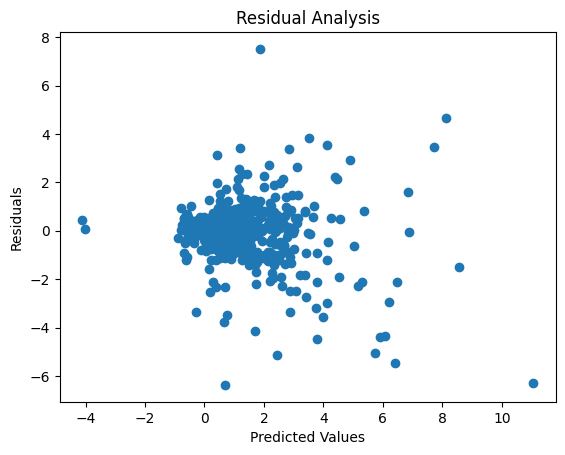

In [ ]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()